In [4]:
import matplotlib.pyplot as plt
import imageio.v3 as iio
import numpy as np
from skimage import filters
from skimage.filters import try_all_threshold, threshold_otsu, threshold_local
%matplotlib inline

In [5]:
# Saved the converted klb as a NumPy array which is loaded here
# About entire dataset: 
frame = np.load('frame_184.npy')

In [6]:
print(f"The shape is: {frame.shape}")
# Frame is the X-Y projection of the 184th 3D frame
# The frame has a single color channel

The shape is: (2048, 2190)


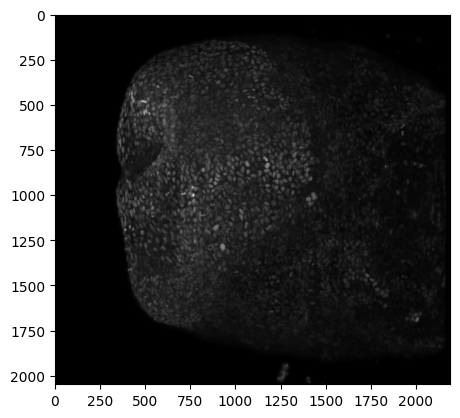

In [7]:
plt.imshow(frame, cmap='gray')

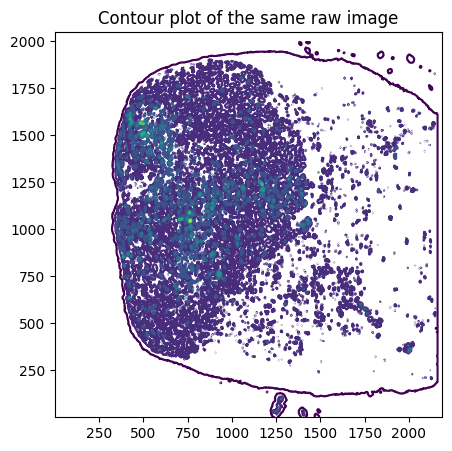

In [8]:
# Contour plotting
fig, ax = plt.subplots(figsize=(5, 5))
qcs = ax.contour(frame, origin='image')
ax.set_title('Contour plot of the same raw image')
plt.show()
# Contouring does not reveal as many details

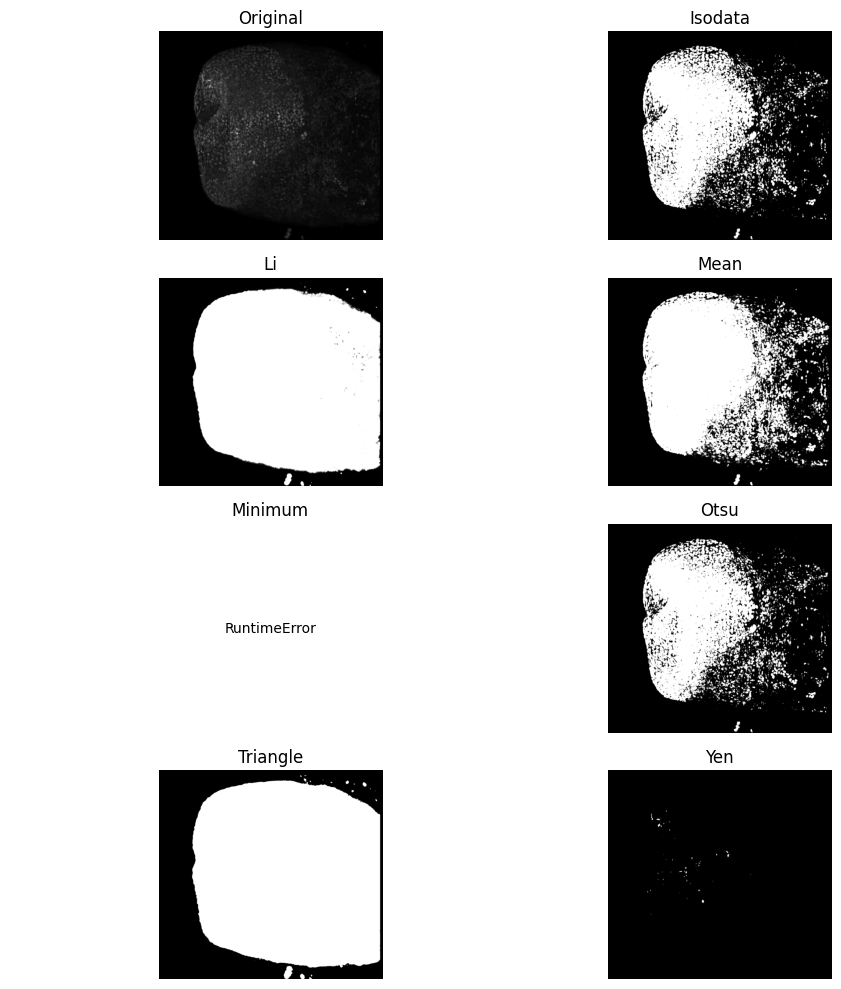

In [9]:
# Try all global thresholding techniques
fig, ax = try_all_threshold(frame, figsize=(10, 10), verbose=False)
plt.show()
# Otsu gives the best results

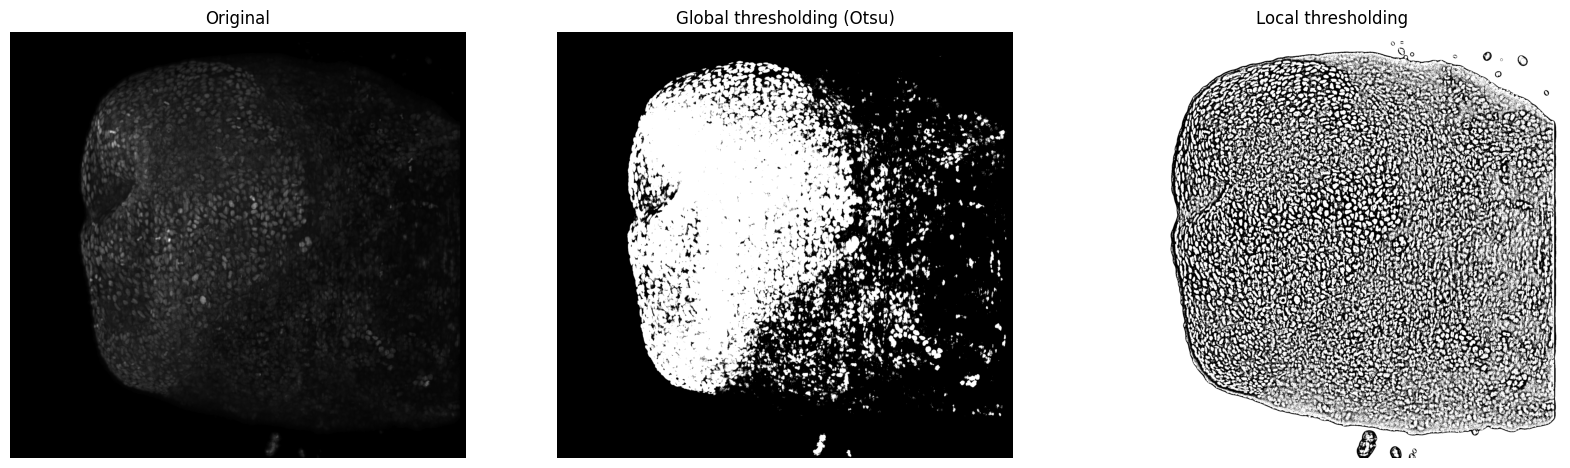

In [10]:
# Global thresholding v/s Local thresholding 
global_thresh = threshold_otsu(frame)
binary_global = frame > global_thresh

block_size = 35
local_thresh = threshold_local(frame, block_size, offset=10)
binary_local = frame > local_thresh

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,60))
ax = axes.ravel()
plt.gray()

ax[0].imshow(frame)
ax[0].set_title('Original')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding (Otsu)')

ax[2].imshow(binary_local)
ax[2].set_title('Local thresholding')

for a in ax:
    a.axis('off')

plt.show()
# There is a rather significant difference when we apply local thresholding as opposed to global thresholding.
# This happens because there is significant variation background intensity.

In [11]:
# Convenience function for plotting
def plot_comparison(plot1, plot2, title1, title2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2,
        figsize=(12, 6),
        sharex=True,
        sharey=True
    )
    ax1.imshow(plot1, cmap='gray')
    ax1.set_title(title1)
    ax2.imshow(plot2, cmap='gray')
    ax2.set_title(title2)

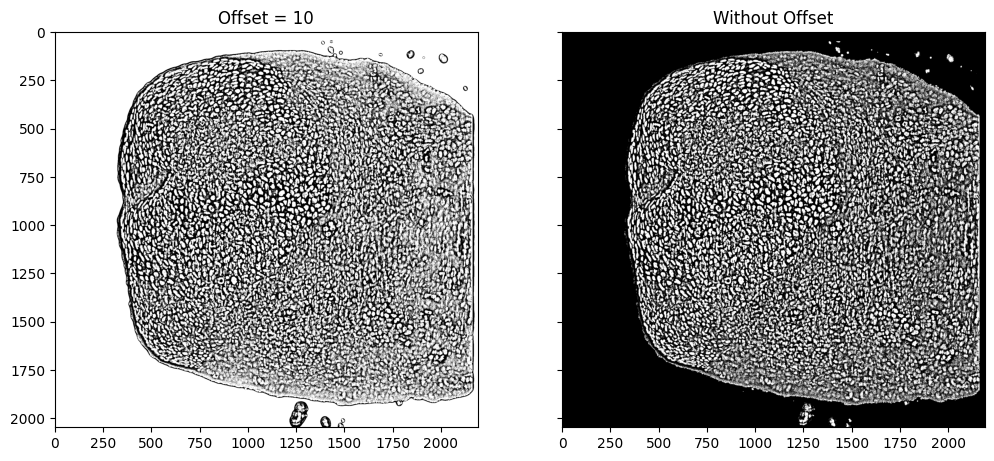

In [12]:
# Deep dive into local thresholding:
local_thresh_1 = threshold_local(frame, block_size=35, offset=10)
mask_1 = frame > local_thresh_1
local_thresh_2 = threshold_local(frame, block_size=35)
mask_2 = frame > local_thresh_2
plot_comparison(mask_1, mask_2, "Offset = 10", "Without Offset")
# Increasing the offset value yields more details of the image

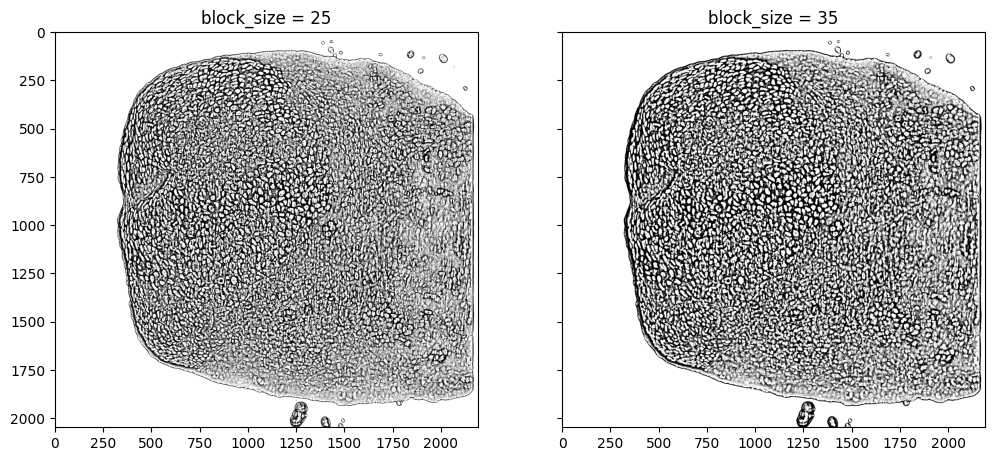

In [13]:
local_thresh_1 = threshold_local(frame, block_size=25, offset=10)
mask_1 = frame > local_thresh_1
local_thresh_2 = threshold_local(frame, block_size=35, offset=10)
mask_2 = frame > local_thresh_2
plot_comparison(mask_1, mask_2, "block_size = 25", "block_size = 35")
# The nuclei are more defined when block_size is set to a higher value

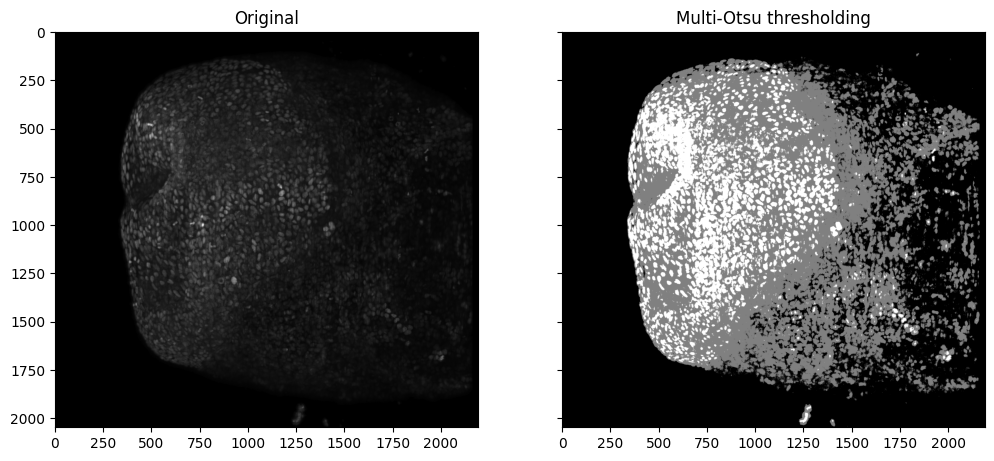

In [14]:
# Try Multi-Otsu thresholding
thresholds = filters.threshold_multiotsu(frame, classes=3)
regions = np.digitize(frame, bins=thresholds)
plot_comparison(frame, regions, "Original", "Multi-Otsu thresholding")